In [1]:
import pandas as pd

!wget https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv

--2023-02-02 02:58:40--  https://course.ccs.neu.edu/cs6220/lecture-labs/lecture-3/abalone.csv
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191962 (187K) [text/csv]
Saving to: ‘abalone.csv’

abalone.csv         100%[===================>] 187.46K  --.-KB/s    in 0.09s   

2023-02-02 02:58:40 (2.00 MB/s) - ‘abalone.csv’ saved [191962/191962]



# Read in Abalone data

In [2]:
df = pd.read_csv("abalone.csv")

# Explore the data

In this lab, you're going to drop features and scatter the points after projecting along 2 principle components axes.

For example, you may drop columns in `Pandas` by typing 


1. Prune the data. Drop columns `Sex` and/or `Rings`. \
   ```matrix = df.loc[:, df.columns != "Sex"]```

1. Calculate the covariance matrix. You can calculate the covariance matrix via: \
   $$Cov(X_i, X_j) = \mathbb{E}[(X_i - \mu_{x_i})(X_j - \mu_{x_j})^T]$$

1. Calculate the first two components of PCA. You can feel free to use `np.linalg.eig`.

1. Verify the principle components. To calculate PCA, feel free to use the PCA function from `scikit.learn`. \

  ```
  from sklearn.decomposition import PCA
  # Two components of PCA
  pca = PCA(2)

  # Fit on data
  pca.fit(A)

  # Access values and vectors
  print(pca.components_)
  print(pca.explained_variance_)

  # transform data
  B = pca.transform(A)
  print(B)
  ```

1. Scatter the data to view it in two dimensions

In [4]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
matrix = df.loc[:, df.columns != "Sex"].to_numpy()
matrix

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [40]:
cov = np.cov(matrix.T)
cov

array([[1.44223076e-02, 1.17608250e-02, 4.15691189e-03, 5.44907081e-02,
        2.39349454e-02, 1.18872298e-02, 1.50071720e-02, 2.15561736e-01],
       [1.17608250e-02, 9.84855103e-03, 3.46054721e-03, 4.50381820e-02,
        1.96742019e-02, 9.78729548e-03, 1.25066369e-02, 1.83871673e-01],
       [4.15691189e-03, 3.46054721e-03, 1.74950266e-03, 1.68034708e-02,
        7.19488681e-03, 3.66016741e-03, 4.75889986e-03, 7.51786501e-02],
       [5.44907081e-02, 4.50381820e-02, 1.68034708e-02, 2.40481389e-01,
        1.05518032e-01, 5.19461632e-02, 6.52158684e-02, 8.54408544e-01],
       [2.39349454e-02, 1.96742019e-02, 7.19488681e-03, 1.05518032e-01,
        4.92675507e-02, 2.26749006e-02, 2.72709563e-02, 3.01203734e-01],
       [1.18872298e-02, 9.78729548e-03, 3.66016741e-03, 5.19461632e-02,
        2.26749006e-02, 1.20152839e-02, 1.38495613e-02, 1.78057215e-01],
       [1.50071720e-02, 1.25066369e-02, 4.75889986e-03, 6.52158684e-02,
        2.72709563e-02, 1.38495613e-02, 1.93773832e-02, 2.

In [43]:
cov.shape

(8, 8)

In [47]:
eigval, eigvec = np.linalg.eig(cov)
eigval, eigvec

(array([1.04954314e+01, 2.39268823e-01, 3.02087647e-03, 2.60218996e-03,
        1.05068657e-03, 1.47688518e-04, 4.88782005e-04, 4.17493194e-04]),
 array([[-2.10513202e-02,  1.83052752e-01, -7.42040211e-01,
          9.06887398e-02,  3.07007218e-02, -6.18893826e-01,
          1.52311416e-01, -5.43508715e-03],
        [-1.79401219e-02,  1.48804192e-01, -5.96175335e-01,
          4.20854302e-02, -2.33409653e-02,  7.83141972e-01,
          7.49734266e-02, -2.93613363e-02],
        [-7.31629638e-03,  5.24595599e-02, -1.40358287e-01,
         -3.71173260e-02, -1.45782231e-03, -4.21715859e-02,
         -9.10437257e-01, -3.81365645e-01],
        [-8.36804920e-02,  8.34461310e-01,  2.28847916e-01,
         -2.20616051e-01,  1.25570884e-01, -2.50039224e-03,
          1.82698066e-01, -3.82722100e-01],
        [-2.97346596e-02,  3.99951598e-01,  1.36354791e-01,
          7.54544047e-01, -3.31709499e-01,  5.43703582e-03,
         -1.68819392e-01,  3.35655300e-01],
        [-1.74599170e-02,  1.83252

(array([  5.,   6.,   1.,   3.,   8.,   7.,  15.,  14.,  35.,  58.,  90.,
         89., 134., 215., 307., 302., 245., 250., 234., 218., 202., 181.,
        185., 163., 179., 169., 145., 133.,  92., 104.,  86.,  52.,  65.,
         33.,  34.,  21.,  12.,  22.,  15.,   8.,  10.,   6.,   9.,   5.,
          1.,   3.,   2.,   2.,   0.,   2.]),
 array([-1.32351118, -1.25315233, -1.18279348, -1.11243463, -1.04207578,
        -0.97171693, -0.90135808, -0.83099923, -0.76064038, -0.69028152,
        -0.61992267, -0.54956382, -0.47920497, -0.40884612, -0.33848727,
        -0.26812842, -0.19776957, -0.12741072, -0.05705186,  0.01330699,
         0.08366584,  0.15402469,  0.22438354,  0.29474239,  0.36510124,
         0.43546009,  0.50581894,  0.5761778 ,  0.64653665,  0.7168955 ,
         0.78725435,  0.8576132 ,  0.92797205,  0.9983309 ,  1.06868975,
         1.13904861,  1.20940746,  1.27976631,  1.35012516,  1.42048401,
         1.49084286,  1.56120171,  1.63156056,  1.70191941,  1.77227827,
 

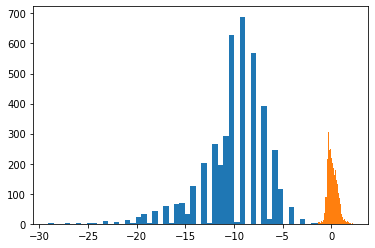

In [48]:
xpoint = matrix.dot(eigvec.T[0])
ypoint = matrix.dot(eigvec.T[1])

plt.hist(xpoint, bins=50)
plt.hist(ypoint, bins=50)

In [49]:
from sklearn.decomposition import PCA
# Two components of PCA
pca = PCA(2)


pca.fit(matrix)
# Fit on data
# pca.fit(A)

# transform data
B = pca.transform(matrix)
print(B)

[[ 5.00480331 -0.86692655]
 [-2.99106199 -0.43457164]
 [-0.94603495 -0.08673867]
 ...
 [-0.88806992  0.5087862 ]
 [ 0.0998919   0.34089986]
 [ 2.18474351  1.11378693]]


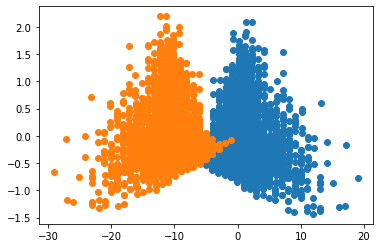

In [50]:
plt.scatter(B.T[0], B.T[1])
plt.scatter(xpoint, ypoint)

In [36]:
# Access values and vectors


print(pca.components_)
print(pca.explained_variance_)

[[ 0.02105132  0.01794012  0.0073163   0.08368049  0.02973466  0.01745992
   0.02743115  0.99510682]
 [ 0.18305275  0.14880419  0.05245956  0.83446131  0.3999516   0.18325279
   0.20527245 -0.0979371 ]]
[10.49543138  0.23926882]


In [12]:
B = pca.transform(matrix)
print(B)

[[ 5.00480331 -0.86692655]
 [-2.99106199 -0.43457164]
 [-0.94603495 -0.08673867]
 ...
 [-0.88806992  0.5087862 ]
 [ 0.0998919   0.34089986]
 [ 2.18474351  1.11378693]]


In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [39]:
Cov = np.sqrt(matrix.T @ matrix) / 4177
Cov

array([[0.00831776, 0.00734727, 0.0043008 , 0.01081691, 0.00712814,
        0.00504976, 0.00579246, 0.03602423],
       [0.00734727, 0.00649512, 0.00380157, 0.00957632, 0.0063088 ,
        0.00446961, 0.00512983, 0.03184379],
       [0.0043008 , 0.00380157, 0.00225361, 0.00563052, 0.00370478,
        0.00262832, 0.00301931, 0.01870267],
       [0.01081691, 0.00957632, 0.00563052, 0.01489921, 0.00982631,
        0.00694724, 0.00793693, 0.04664124],
       [0.00712814, 0.0063088 , 0.00370478, 0.00982631, 0.00653531,
        0.00457871, 0.00520337, 0.03044233],
       [0.00504976, 0.00446961, 0.00262832, 0.00694724, 0.00457871,
        0.00326862, 0.00369334, 0.02172793],
       [0.00579246, 0.00512983, 0.00301931, 0.00793693, 0.00520337,
        0.00369334, 0.00427712, 0.02520714],
       [0.03602423, 0.03184379, 0.01870267, 0.04664124, 0.03044233,
        0.02172793, 0.02520714, 0.16159285]])

In [25]:
eigval, eigvec = np.linalg.eig(Cov)

In [26]:
eigvec

array([[ 1.99400847e-01, -1.47243569e-01,  6.69809856e-01,
         1.00193744e-01, -6.44205889e-01, -3.27943629e-02,
        -2.52572937e-01, -2.19502864e-03],
       [ 1.76291759e-01, -1.36620321e-01,  5.53976973e-01,
         1.23612203e-01,  7.63829532e-01, -2.54359322e-02,
        -2.07665500e-01, -2.96334320e-02],
       [ 1.03539404e-01, -8.18270513e-02,  2.69703154e-01,
         1.76758854e-01, -7.27394889e-03, -2.27582781e-02,
         9.35911935e-01,  4.58087608e-02],
       [ 2.60478721e-01, -6.22686739e-01, -2.73521323e-01,
         3.79331444e-02, -9.55172892e-03, -6.83527491e-01,
        -2.86057945e-02,  6.31386501e-03],
       [ 1.70416717e-01, -4.69457727e-01,  2.96973602e-03,
        -6.48832153e-01,  5.40666600e-03,  4.48381510e-01,
         8.97187200e-02, -3.47060433e-01],
       [ 1.21390393e-01, -2.96408953e-01, -9.16183709e-02,
         2.66850261e-02,  1.28917580e-02,  3.64416550e-01,
        -5.14847698e-02,  8.67573506e-01],
       [ 1.40390818e-01, -2.737354

(array([  1.,   1.,   0.,   9.,  11.,  44.,  50., 147., 199., 379., 396.,
        519., 434., 342., 316., 210., 168., 145., 107., 102.,  86.,  79.,
         60.,  58.,  54.,  34.,  41.,  21.,  36.,  18.,  17.,   9.,  17.,
         19.,  14.,   8.,   3.,   3.,   2.,   3.,   6.,   0.,   4.,   2.,
          0.,   0.,   0.,   1.,   1.,   1.]),
 array([ 0.40501199,  0.60677209,  0.8085322 ,  1.0102923 ,  1.2120524 ,
         1.41381251,  1.61557261,  1.81733272,  2.01909282,  2.22085293,
         2.42261303,  2.62437314,  2.82613324,  3.02789335,  3.22965345,
         3.43141356,  3.63317366,  3.83493377,  4.03669387,  4.23845398,
         4.44021408,  4.64197419,  4.84373429,  5.04549439,  5.2472545 ,
         5.4490146 ,  5.65077471,  5.85253481,  6.05429492,  6.25605502,
         6.45781513,  6.65957523,  6.86133534,  7.06309544,  7.26485555,
         7.46661565,  7.66837576,  7.87013586,  8.07189597,  8.27365607,
         8.47541617,  8.67717628,  8.87893638,  9.08069649,  9.28245659,
 

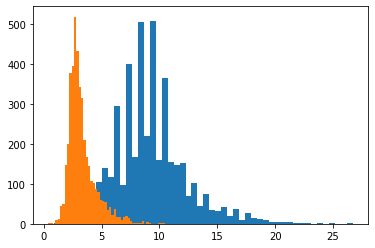

In [27]:
xpoint = matrix.dot(eigvec.T[0])
ypoint = matrix.dot(eigvec.T[1])

plt.hist(xpoint, bins=50)
plt.hist(ypoint, bins=50)

In [21]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.02105132  0.01794012  0.0073163   0.08368049  0.02973466  0.01745992
   0.02743115  0.99510682]
 [ 0.18305275  0.14880419  0.05245956  0.83446131  0.3999516   0.18325279
   0.20527245 -0.0979371 ]]
[10.49543138  0.23926882]


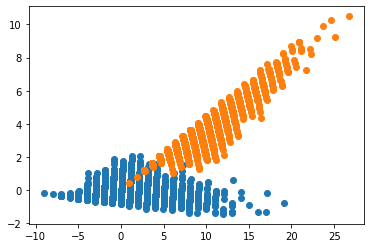

In [32]:
plt.scatter(B.T[0], B.T[1])
plt.scatter(xpoint, ypoint)